# TASK-3 IRIS FLOWER CLASSIFICATION

## Importing Libraries and Dataset

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

iris = pd.read_csv("task3.csv")


## Explore the shape of Dataset

In [16]:
iris.shape

(150, 5)

## Explore the information of the dataset

In [17]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Extracting Independent Variables

In [18]:
X = iris.iloc[ : , 0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Extracting Dependent Variable "species"

In [21]:
Y = iris.iloc[ : , 4: ]
Y.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Implementing CART Algorithm for Decision tree Learning

In [6]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , 
                                                   Y, 
                                                   test_size = 0.25, 
                                                   random_state = 5)
X_train

,sepal_length,sepal_width,petal_length,petal_width
40,5.0,3.5,1.3,0.3
115,6.4,3.2,5.3,2.3
142,5.8,2.7,5.1,1.9
69,5.6,2.5,3.9,1.1
17,5.1,3.5,1.4,0.3
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


## construct the decision tree model

In [7]:

from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier(random_state = 1234, criterion = 'entropy')


# fit() method will construct the decision tree 
# by fitting the given training dataset.

clf.fit(X_train , Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1234)

## Visualize the decision tree as text representation

In [8]:


from sklearn import tree

text_representation = tree.export_text(clf)

print(text_representation)


|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_3 <= 1.45
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.45
|   |   |   |--- feature_1 <= 2.60
|   |   |   |   |--- feature_0 <= 6.10
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_0 >  6.10
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_1 >  2.60
|   |   |   |   |--- feature_0 <= 7.05
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- feature_0 >  7.05
|   |   |   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- class: Iris-virginica



## Visualizing the decision tree pictorially

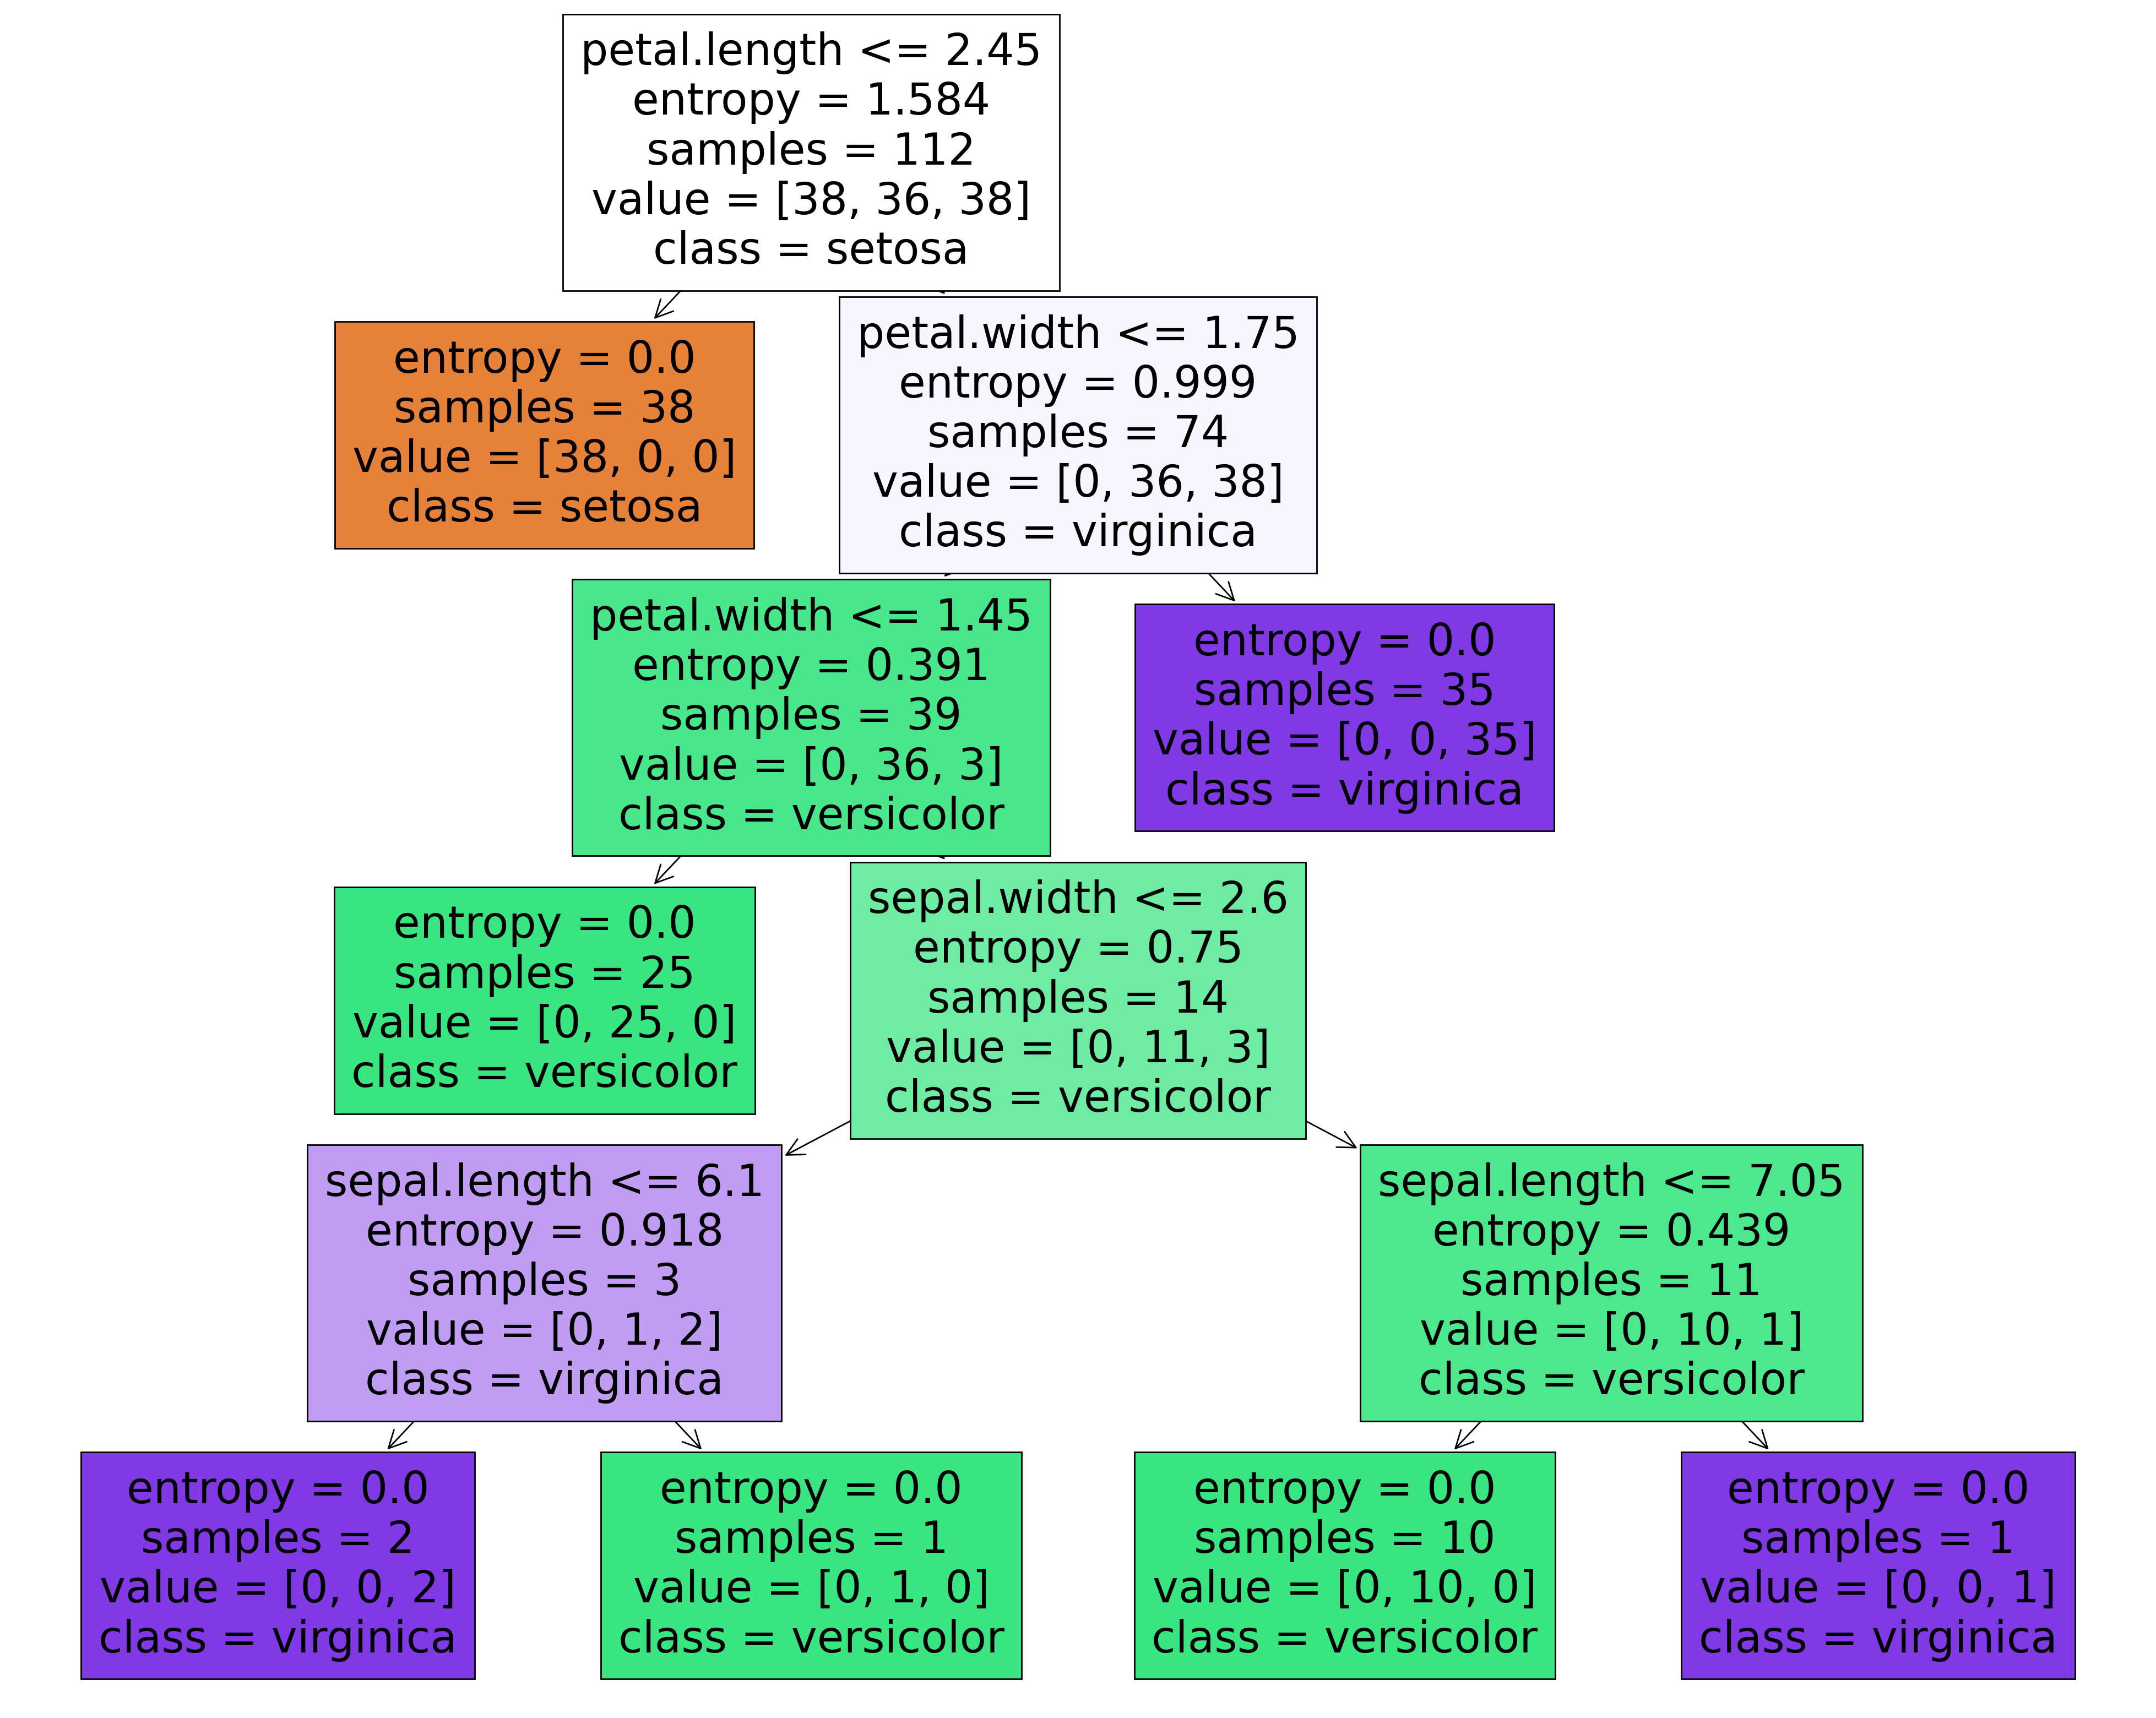

In [9]:
fig = plt.figure(figsize = (25 , 20) , dpi = 200.0)

_ = tree.plot_tree(clf, 
                   feature_names = ['sepal.length' ,'sepal.width', 'petal.length', 'petal.width'],
                   class_names = ['setosa', 'versicolor', 'virginica'],
                   filled = True)

## Test the accuracy of the decision tree model 

In [11]:
from sklearn.metrics import accuracy_score

pred_train = clf.predict(X_train)

accuracy_train = accuracy_score(Y_train, pred_train)

print('% of Accuracy on training data: ', accuracy_train * 100 )



# Let us test the accuracy of the model on the test data (or new data or unseen data).

pred_test = clf.predict(X_test)

accuracy_test = accuracy_score(Y_test, pred_test)

print('% of Accuracy on test data: ', accuracy_test * 100 )



% of Accuracy on training data:  100.0
% of Accuracy on test data:  92.10526315789474


# This task is completed by GAGANDEEP KANTA